# Final Project - Yun Tong

## Segmentation

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math

In [2]:
df_rep = pd.read_pickle(r'customer_service_reps')

In [3]:
df_rep

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [4]:
df_engage = pd.read_pickle(r'engagement')
df_engage

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [145]:
df_subs = pd.read_csv('/Users/TongYun/Desktop/NYU/2Fall/Marketing Analytics/Final Project/data/subscribers.csv')
df_subs

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [8]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [9]:
import datetime as dt

In [10]:
df_engage['year'] = pd.DatetimeIndex(df_engage['date']).year
df_engage['month'] = pd.DatetimeIndex(df_engage['date']).month
df_engage['day'] = pd.DatetimeIndex(df_engage['date']).day

In [11]:
df_engage

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,year,month,day
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,2019,7,1
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,2019,7,2
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2019,7,3
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,2019,7,2
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0,2019,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0,2020,4,21
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0,2020,4,22
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0,2020,4,23
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0,2020,4,24


In [31]:
len(df_engage2)

2585724

In [34]:
df_engage2 = df_engage.loc[:, df_engage.columns != 'date']
df_engage2 = df_engage2.dropna()

In [35]:
len(df_engage2)

2551113

In [41]:
df_engage2.columns

Index(['subid', 'app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period', 'year', 'month', 'day'],
      dtype='object')

In [39]:
select_value = lambda x : list(x)[0]

In [48]:
agg_funcs = {'subid' : select_value, 'app_opens' : sum, 'cust_service_mssgs' : sum, 'num_videos_completed': sum, 'num_videos_more_than_30_seconds':sum, 'num_videos_rated':sum, 'num_series_started':sum, 'payment_period':max, 'year':select_value, 'month':select_value, 'day':select_value}

In [49]:
df_engage2 = df_engage2.groupby('subid', as_index=False).agg(agg_funcs)

In [50]:
df_engage2

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,year,month,day
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0,0.0,2019,6,30
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0,0.0,2020,3,8
2,20000604,14.0,5.0,8.0,68.0,0.0,1.0,2.0,2020,2,9
3,20000685,46.0,10.0,14.0,165.0,0.0,8.0,25.0,2020,3,3
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0,0.0,2019,8,25
...,...,...,...,...,...,...,...,...,...,...,...
135014,29999740,15.0,3.0,11.0,31.0,0.0,0.0,0.0,2019,7,11
135015,29999820,12.0,6.0,22.0,50.0,0.0,7.0,0.0,2019,9,22
135016,29999822,5.0,4.0,2.0,25.0,0.0,1.0,0.0,2019,11,22
135017,29999889,245.0,45.0,326.0,326.0,40.0,68.0,91.0,2019,8,23


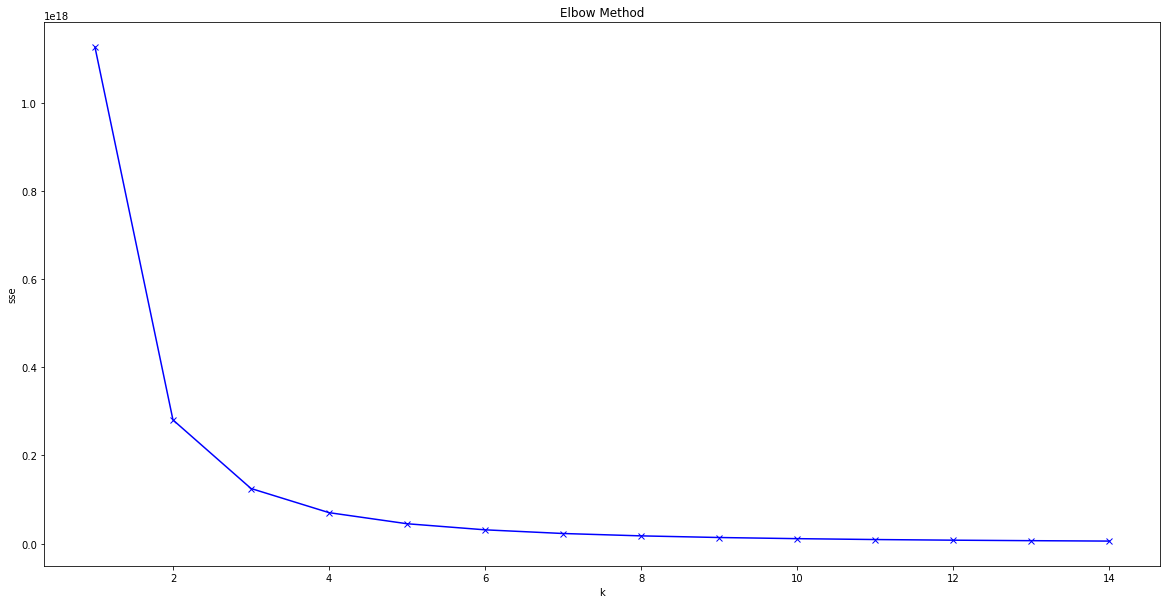

In [51]:
sse = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(df_engage2)
    sse.append(km.inertia_)
plt.figure(figsize = (20, 10))
plt.plot(range(1,15), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3, random_state=666).fit(df_engage2)

In [53]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.50144932e+07 4.19744986e+01 7.33464224e+00 5.23956851e+01
  8.25404609e+01 1.11220187e+00 1.28564958e+01 1.20736262e+01
  2.01933957e+03 6.89719105e+00 1.49923696e+01]
 [2.83429391e+07 4.28994266e+01 7.37810232e+00 5.31156706e+01
  8.32986068e+01 1.10671087e+00 1.30227802e+01 1.22119882e+01
  2.01934034e+03 6.89864259e+00 1.49849252e+01]
 [2.16764474e+07 4.25341792e+01 7.37197612e+00 5.29024454e+01
  8.32362471e+01 1.11957238e+00 1.30079686e+01 1.21745840e+01
  2.01934072e+03 6.89164508e+00 1.50055758e+01]]


In [369]:
col_seg = list(df_churn.columns)[1:16]
df_seg = df_churn[col_seg]
df_seg

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS
0,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1
1,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0
2,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1
5,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1
6,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1
135013,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0
135016,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1
135017,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1


In [422]:
df_seg.columns

Index(['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'year', 'month', 'day', 'payment_period_y',
       'num_weekly_services_utilized', 'weekly_consumption_hour', 'age',
       'male_TF', 'op_sys_iOS'],
      dtype='object')

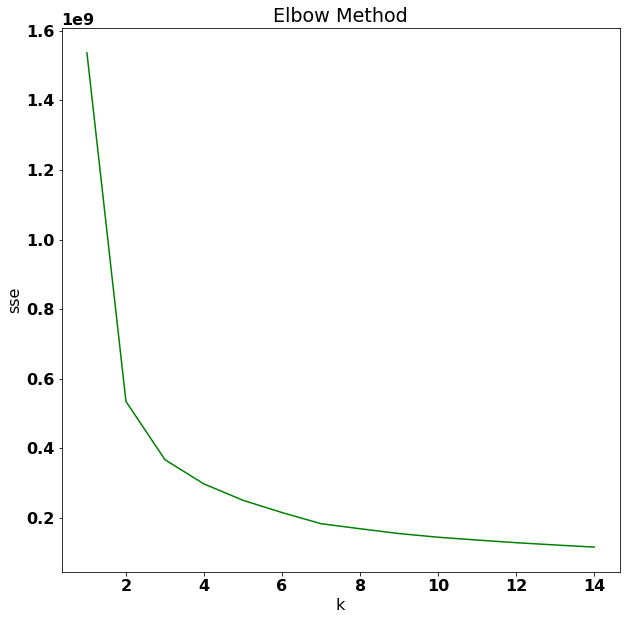

In [435]:
sse = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(df_seg)
    sse.append(km.inertia_)
font = {'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize = (10, 10))
plt.plot(range(1,15), sse, 'g')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()

In [370]:
kmeans2 = KMeans(n_clusters=3, random_state=666).fit(df_seg)

In [371]:
centroids2 = kmeans2.cluster_centers_
print(centroids2)

[[7.99490343e+01 1.52948632e+01 1.25984777e+02 1.97531585e+02
  3.35481491e+00 3.39890021e+01 2.01933530e+03 6.53795601e+00
  1.44049759e+01 3.36589324e+01 3.03118294e+00 2.85050505e+01
  4.73128468e+01 1.61883047e-01 6.21646996e-01]
 [1.62588397e+01 4.58531043e+00 2.35078773e+01 4.19074906e+01
  1.91632608e-02 5.04073465e+00 2.01934267e+03 6.84815236e+00
  1.48995201e+01 1.17950718e+00 3.00423966e+00 2.78328915e+01
  4.48017321e+01 1.03159394e-01 6.63778045e-01]
 [2.24987064e+02 2.43203378e+01 2.41142652e+02 2.92546892e+02
  7.65792310e+00 5.89712540e+01 2.01912900e+03 7.72906935e+00
  1.44976644e+01 7.26221703e+01 2.97682357e+00 2.82382607e+01
  4.97238926e+01 1.33129716e-01 8.08839382e-01]]


In [429]:
cent = pd.DataFrame(centroids2)
cent = cent.transpose()
cent.to_csv('clustering_centroids.csv')

In [437]:
kmeans2_genre = KMeans(n_clusters=3, random_state=666).fit_predict(df_seg)

In [438]:
df_seg["cluster"] = kmeans2_genre
df_seg

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS,cluster
0,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1,1
1,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0,0
2,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1,0
5,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1,1
6,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1,1
135013,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0,1
135016,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1,1
135017,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1,1


In [439]:
df_seg['cluster'].value_counts()

1    58970
0    14912
2     5563
Name: cluster, dtype: int64

In [444]:
df_churn.columns
df_inner_join = pd.merge(df_subs, df_engage2, on=['subid'])

Index(['subid', 'app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'year', 'month', 'day', 'payment_period_y',
       'num_weekly_services_utilized', 'weekly_consumption_hour', 'age',
       'male_TF', 'op_sys_iOS', 'current_churn_TF'],
      dtype='object')

In [472]:
df_seg_genre = df_churn[df_churn.columns.drop('current_churn_TF')]
df_seg_genre

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1
5,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1
6,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1
135013,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1


In [476]:
df_seg_genre = df_seg_genre.merge(df_subs[['subid', 'package_type', 'preferred_genre']], how = 'left', on=['subid'])
df_seg_genre

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS,package_type,preferred_genre
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1,enhanced,regional
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0,base,comedy
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1,base,drama
3,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1,base,regional
4,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1,economy,comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79440,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1,base,drama
79441,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0,base,comedy
79442,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1,base,drama
79443,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1,enhanced,comedy


In [477]:
df_seg_genre["cluster"] = kmeans2_genre
df_seg_genre

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS,package_type,preferred_genre,cluster
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1,enhanced,regional,1
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0,base,comedy,0
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1,base,drama,0
3,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1,base,regional,1
4,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1,economy,comedy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79440,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1,base,drama,1
79441,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0,base,comedy,1
79442,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1,base,drama,1
79443,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1,enhanced,comedy,1


In [496]:
genre_grp = df_seg_genre.groupby(by = ['cluster','preferred_genre']).count()
genre_grp[['subid']]

subid
cluster preferred_genre       
0       comedy            5439
        drama             2857
        international      583
        other              506
        regional           910
1       comedy           30949
        drama            11109
        international     1543
        other             1068
        regional          2723
2       comedy            1760
        drama              910
        international      187
        other              187
        regional           263

## Allocation & Attribution

##### Pre-processing

In [160]:
dc = '/Users/TongYun/Desktop/NYU/2Fall/Marketing Analytics/Final Project/data/'

In [161]:
df_channel = pd.read_csv(dc+'channel_spend_graduate.csv')
df_channel.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [163]:
dates = sorted(df_channel['date'].value_counts().index.tolist())
dates

[201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002]

In [164]:
df_channel = df_channel.pivot(index='date', columns='channel', values='spend_AED')
df_channel

channel,bing,display,facebook,search,youtube
date,,,,,
201907,400,12,9000,13000,90
201908,900,20,13000,18500,180
201909,1000,13,10500,19000,100
201910,1100,19,17000,24000,130
201911,1300,29,23000,25000,550
201912,300,31,16000,38000,900
202001,2100,148,11000,41000,4360
202002,3700,94,14000,44000,2420


In [165]:
df_channel['Total'] = df_channel.sum(axis=1)
df_channel.loc['Total'] = df_channel.sum()
df_channel

channel,bing,display,facebook,search,youtube,Total
date,,,,,,
201907,400,12,9000,13000,90,22502
201908,900,20,13000,18500,180,32600
201909,1000,13,10500,19000,100,30613
201910,1100,19,17000,24000,130,42249
201911,1300,29,23000,25000,550,49879
201912,300,31,16000,38000,900,55231
202001,2100,148,11000,41000,4360,58608
202002,3700,94,14000,44000,2420,64214
Total,10800,366,113500,222500,8730,355896


In [170]:
channel_subs = df_subs['attribution_technical'].value_counts().to_dict()
channel_subs

{'facebook': 80251,
 'email': 25690,
 'search': 25306,
 'organic': 22013,
 'brand sem intent google': 18524,
 'google_organic': 10691,
 'affiliate': 9894,
 'email_blast': 7277,
 'pinterest': 6065,
 'referral': 5170,
 'facebook_organic': 3272,
 'discovery': 2571,
 'brand sem intent bing': 2231,
 'other': 1786,
 'display': 1407,
 'bing': 1146,
 'internal': 1122,
 'podcast': 985,
 'youtube': 913,
 'bing_organic': 369,
 'vod': 297,
 'ott': 158,
 'direct_mail': 139,
 'quora': 100,
 'samsung': 86,
 'appstore': 44,
 'criteo': 44,
 'pinterest_organic': 30,
 'influencer': 21,
 'playstore': 12,
 'content_greatist': 5,
 'twitter': 5,
 'tv': 4}

In [173]:
channel_name = list(df_channel.columns)
channel_name

['bing', 'display', 'facebook', 'search', 'youtube', 'Total']

In [174]:
total_subs_channel = list()
summ = 0
for i in channel_name:
    if i != 'Total':
        temp = channel_subs[i]
        total_subs_channel.append(temp)
        summ += temp
    else:
        total_subs_channel.append(summ)
total_subs_channel

[1146, 1407, 80251, 25306, 913, 109023]

In [176]:
df_channel.loc['Total_subs'] = total_subs_channel

In [419]:
df_channel.loc['CAC'] = df_channel.loc['Total']/df_channel.loc['Total_subs']
df_channel

channel,bing,display,facebook,search,youtube,Total
date,,,,,,
201907,400.000000,12.000000,9000.000000,13000.000000,90.000000,22502.000000
201908,900.000000,20.000000,13000.000000,18500.000000,180.000000,32600.000000
201909,1000.000000,13.000000,10500.000000,19000.000000,100.000000,30613.000000
201910,1100.000000,19.000000,17000.000000,24000.000000,130.000000,42249.000000
201911,1300.000000,29.000000,23000.000000,25000.000000,550.000000,49879.000000
201912,300.000000,31.000000,16000.000000,38000.000000,900.000000,55231.000000
202001,2100.000000,148.000000,11000.000000,41000.000000,4360.000000,58608.000000
202002,3700.000000,94.000000,14000.000000,44000.000000,2420.000000,64214.000000
Total,10800.000000,366.000000,113500.000000,222500.000000,8730.000000,355896.000000


In [420]:
df_channel = df_channel.round(2)
df_channel

channel,bing,display,facebook,search,youtube,Total
date,,,,,,
201907,400.00,12.00,9000.00,13000.00,90.00,22502.00
201908,900.00,20.00,13000.00,18500.00,180.00,32600.00
201909,1000.00,13.00,10500.00,19000.00,100.00,30613.00
201910,1100.00,19.00,17000.00,24000.00,130.00,42249.00
201911,1300.00,29.00,23000.00,25000.00,550.00,49879.00
201912,300.00,31.00,16000.00,38000.00,900.00,55231.00
202001,2100.00,148.00,11000.00,41000.00,4360.00,58608.00
202002,3700.00,94.00,14000.00,44000.00,2420.00,64214.00
Total,10800.00,366.00,113500.00,222500.00,8730.00,355896.00


In [502]:
df_channel.to_csv('channel_spend_CAC.csv')

## Churn

In [180]:
df_inner_join = pd.merge(df_subs, df_engage2, on=['subid'])
df_inner_join.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,year,month,day
0,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,2.0,2.0,13.0,13.0,0.0,1.0,0.0,2019,12,7
1,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,40.0,17.0,182.0,182.0,6.0,39.0,31.0,2020,2,19
2,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,...,104.0,10.0,84.0,206.0,0.0,29.0,31.0,2020,3,5
3,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,...,3.0,3.0,2.0,13.0,0.0,0.0,0.0,2020,2,23
4,290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,...,4.0,3.0,2.0,12.0,0.0,0.0,0.0,2019,12,1


In [182]:
df_inner_join.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period_x', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period_y', 'year', 'month', 'day'],
      dtype='object')

In [204]:
list(df_engage2.columns)

['subid',
 'app_opens',
 'cust_service_mssgs',
 'num_videos_completed',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'payment_period',
 'year',
 'month',
 'day']

In [205]:
col = list(df_engage2.columns)
col.remove('payment_period')
col.append('payment_period_y')
sub_join_col = ['subid', 'num_weekly_services_utilized', 'weekly_consumption_hour', 'age', 'male_TF', 'op_sys', 'current_sub_TF']
for i in sub_join_col:
    if i not in col:
        col.append(i)
col

['subid',
 'app_opens',
 'cust_service_mssgs',
 'num_videos_completed',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'year',
 'month',
 'day',
 'payment_period_y',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'age',
 'male_TF',
 'op_sys',
 'current_sub_TF']

In [295]:
df_churn = df_inner_join[col]
df_churn

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys,current_sub_TF
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,True,iOS,False
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,False,Android,True
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,False,iOS,True
3,24930568,3.0,3.0,2.0,13.0,0.0,0.0,2020,2,23,0.0,NaN,25.851492,73.0,False,iOS,True
4,21361112,4.0,3.0,2.0,12.0,0.0,0.0,2019,12,1,0.0,NaN,37.451142,24.0,True,iOS,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,50.0,16.0,92.0,176.0,3.0,22.0,2020,1,14,13.0,NaN,NaN,NaN,False,Android,False
135015,25549852,1.0,2.0,0.0,6.0,0.0,0.0,2020,3,6,0.0,NaN,28.751405,61.0,False,Android,True
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,False,iOS,True
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,False,iOS,True


In [296]:
df_churn = df_churn.dropna()
df_churn

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys,current_sub_TF
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,True,iOS,False
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,False,Android,True
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,False,iOS,True
5,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,False,iOS,False
6,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,False,iOS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,False,iOS,True
135013,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,False,Android,True
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,False,iOS,True
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,False,iOS,True


In [297]:
df_churn.replace({False: 0, True: 1}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [298]:
df_churn

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys,current_sub_TF
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,iOS,0
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,Android,1
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,iOS,1
5,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,iOS,0
6,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,iOS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,iOS,1
135013,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,Android,1
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,iOS,1
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,iOS,1


In [299]:
df_churn = df_churn[(df_churn['age'] < 100) & (df_churn['age'] > 0) & (df_churn['weekly_consumption_hour'] > 0)]
df_churn

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys,current_sub_TF
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,iOS,0
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,Android,1
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,iOS,1
5,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,iOS,0
6,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,iOS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,iOS,1
135013,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,Android,1
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,iOS,1
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,iOS,1


In [300]:
df_churn['op_sys'].replace({'Android': 0, 'iOS': 1}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [301]:
df_churn = df_churn.rename(columns={'op_sys': 'op_sys_iOS'})

In [302]:
df_churn['current_sub_TF'].replace({1: 0, 0: 1}, inplace=True)
df_churn = df_churn.rename(columns={'current_sub_TF': 'current_churn_TF'})

In [303]:
df_churn

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS,current_churn_TF
0,26844789,2.0,2.0,13.0,13.0,0.0,1.0,2019,12,7,0.0,3.0,36.001186,25.0,1,1,1
1,29726122,40.0,17.0,182.0,182.0,6.0,39.0,2020,2,19,31.0,2.0,20.051667,61.0,0,0,0
2,20299962,104.0,10.0,84.0,206.0,0.0,29.0,2020,3,5,31.0,3.0,34.551230,23.0,0,1,0
5,25393847,12.0,4.0,18.0,22.0,0.0,3.0,2019,9,28,0.0,2.0,28.751405,57.0,0,1,1
6,23163827,71.0,6.0,52.0,68.0,0.0,12.0,2019,8,16,0.0,3.0,33.101274,54.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135010,26828621,2.0,1.0,3.0,11.0,0.0,1.0,2020,2,26,0.0,4.0,27.301448,44.0,0,1,0
135013,25492551,3.0,4.0,12.0,13.0,0.0,1.0,2019,9,30,0.0,3.0,30.201361,32.0,0,0,0
135016,25835684,31.0,5.0,47.0,59.0,0.0,8.0,2020,1,1,0.0,2.0,24.401536,43.0,0,1,0
135017,21434712,16.0,3.0,20.0,36.0,0.0,2.0,2019,11,17,0.0,3.0,28.751405,38.0,0,1,0


In [304]:
df_churn['age'].describe()

count    79445.000000
mean        45.617926
std         13.267014
min         18.000000
25%         35.000000
50%         45.000000
75%         55.000000
max         89.000000
Name: age, dtype: float64

##### Analysis

In [331]:
pd.options.display.max_columns = 25

In [332]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['current_churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['current_churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['current_churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [333]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [334]:
df_train, df_test = model_selection.train_test_split(df_churn, test_size=0.3)

In [335]:
x_col = list(df_churn.columns)
x_col.remove('current_churn_TF')
x_col.remove('subid')
x_col

['app_opens',
 'cust_service_mssgs',
 'num_videos_completed',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'year',
 'month',
 'day',
 'payment_period_y',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'age',
 'male_TF',
 'op_sys_iOS']

In [336]:
y_col_name = 'current_churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = x_col    # list of x covariates
add_constant_TF = True

In [337]:
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [503]:
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LPM MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LPM MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:       current_churn_TF   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1557.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:50:10   Log-Likelihood:                -30427.
No. Observations:               55611   AIC:                         6.089e+04
Df Residuals:                   55595   BIC:                         6.103e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [339]:
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.515262
         Iterations 13

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:       current_churn_TF   No. Observations:                55611
Model:                          Logit   Df Residuals:                    55595
Method:                           MLE   Df Model:                           15
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2531
Time:                        19:41:54   Log-Likelihood:                -28654.
converged:                       True   LL-Null:                       -38362.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
app_opens                       

In [340]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

In [341]:
df_test

,const,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,year,month,day,payment_period_y,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,op_sys_iOS,current_churn_TF,prob_churn_lpm,prob_churn_logit
114449,1.0,24055934,223.0,7.0,169.0,170.0,0.0,38.0,2020,3,19,23.0,2.0,28.751405,42.0,0,1,0,0.295328,0.272019
63242,1.0,21005273,3.0,2.0,7.0,18.0,0.0,1.0,2019,9,19,1.0,3.0,38.901099,41.0,1,0,1,0.551947,0.575574
4257,1.0,23876317,10.0,5.0,21.0,32.0,0.0,4.0,2020,3,8,0.0,3.0,31.651317,50.0,0,1,0,0.234236,0.192837
48818,1.0,20827362,20.0,5.0,43.0,51.0,0.0,6.0,2020,3,3,0.0,4.0,37.451142,59.0,1,1,1,0.269160,0.213310
13992,1.0,22102994,14.0,2.0,5.0,46.0,0.0,5.0,2019,11,2,0.0,3.0,36.001186,49.0,0,1,0,0.353518,0.312781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53881,1.0,23157478,15.0,5.0,14.0,28.0,0.0,3.0,2019,10,30,0.0,3.0,24.401536,29.0,0,1,0,0.279709,0.217773
110700,1.0,21234973,18.0,5.0,28.0,69.0,0.0,4.0,2019,10,12,7.0,2.0,28.751405,39.0,0,1,0,0.572864,0.627831
90989,1.0,29358384,262.0,21.0,259.0,323.0,5.0,61.0,2019,8,4,91.0,3.0,22.951579,66.0,0,1,0,0.868372,0.885283
18856,1.0,25342394,41.0,15.0,5.0,206.0,0.0,40.0,2019,6,30,31.0,3.0,33.101274,81.0,1,1,1,1.092265,0.964751


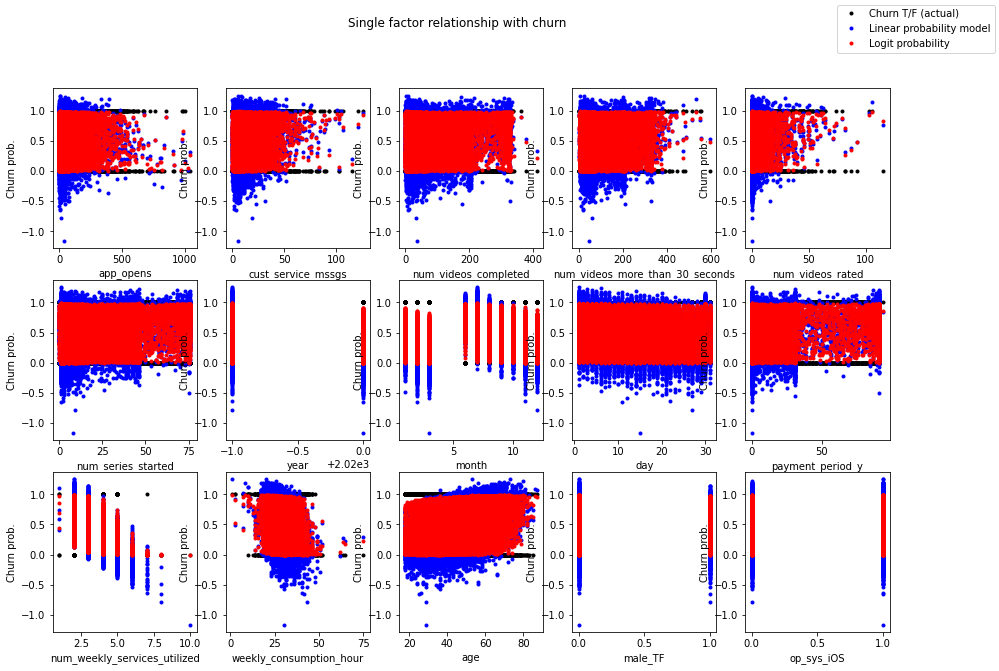

In [342]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 3
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 10))
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['current_churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

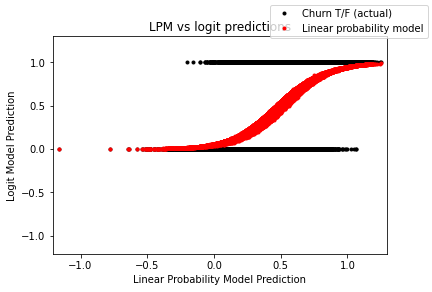

In [343]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['current_churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [344]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['current_churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['current_churn_TF'], df_test['prob_churn_lpm'])

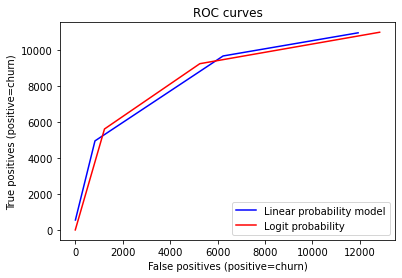

In [345]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [381]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [380]:
df_subs['monthly_price'].describe()

count    227628.000000
mean          4.732049
std           0.101049
min           0.807400
25%           4.734300
50%           4.734300
75%           4.734300
max           5.101300
Name: monthly_price, dtype: float64

In [382]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [383]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acc_rate_churn = 0.3 + 2 * t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acc_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

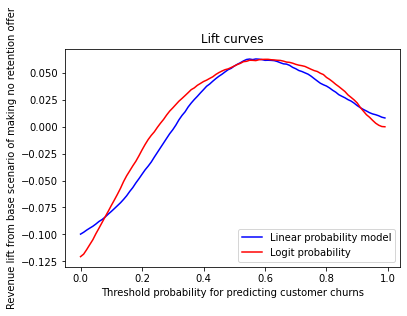

In [384]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [505]:
df_lift_threshold[df_lift_threshold['lpm_offer'] == df_lift_threshold['lpm_offer'].max()]

,threshold,no_offer,lpm_offer,logit_offer
57,0.57,0.0,0.06302,0.061493


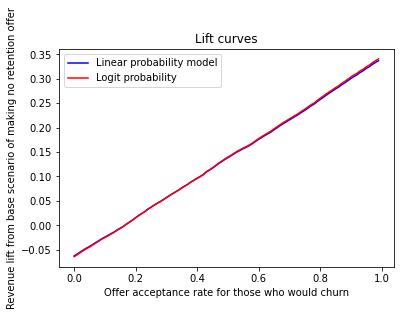

In [385]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [506]:
df_lift_acceptance_rate_churn[df_lift_acceptance_rate_churn['lpm_offer'] == df_lift_acceptance_rate_churn['lpm_offer'].max()]

,acceptance_rate_churn,no_offer,lpm_offer,logit_offer
99,0.99,0.0,0.336762,0.340323


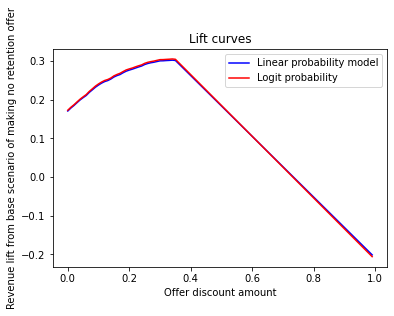

In [386]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [410]:
disc_lift[disc_lift['lpm_offer'] == disc_lift['lpm_offer'].max()]

,discount_amount,lpm_offer
34,0.34,0.302087


In [387]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')

In [388]:
def roc_draw(y_test, pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

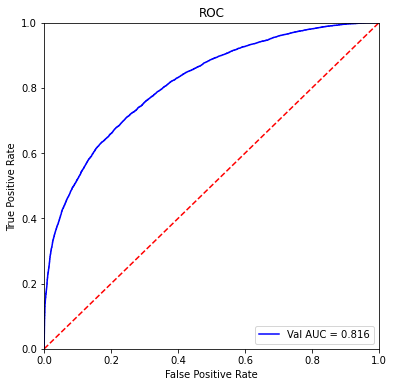

In [389]:
roc_draw(df_test['current_churn_TF'],df_test['prob_churn_lpm'])